In [25]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Chrome 드라이버 설정
service = Service(executable_path="../driver/chromedriver-linux64/chromedriver")
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)
driver.get("https://www.kobis.or.kr/kobis/business/stat/boxs/findYearlyBoxOfficeList.do")

# 연도 리스트 (2014-2024)
year_list = [str(year) for year in range(2018,2019)]

# 페이지 로드 대기
wait = WebDriverWait(driver, 100)

# 전체 데이터를 저장할 리스트
all_data2 = []

for year in year_list:
    if year == "2024":
        driver.get(f"https://www.kobis.or.kr/kobis/business/stat/boxs/findYearlyBoxOfficeList.do?year={year}")
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "tbl_comm")))
    else:
        # 연도 선택 후 조회
        search_m = driver.find_element(By.ID, "sSearchYearFrom")
        search_m.find_element(By.CSS_SELECTOR, f"option[value='{year}']").click()
        driver.find_element(By.CLASS_NAME, "btn_blue").click()
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "tbl_comm")))

    for i in range(50):  # 최대 50개 영화
        # 테이블 찾기
        table_element = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "tbl_comm")))
        movie_row = table_element.find_element(By.XPATH, f"//tbody/tr[{i + 1}]")

        # 영화 링크 클릭
        movie_link = movie_row.find_element(By.CLASS_NAME, "ellip.per90").find_element(By.TAG_NAME, "a")
        movie_link.click()

        # 영화 이름 추출
        movie_title = driver.find_element(By.CLASS_NAME, "hd_layer").find_element(By.CLASS_NAME, "tit").text.strip()
        print(f"영화 {i + 1}: {movie_title}")

        # 통계정보 탭 클릭
        WebDriverWait(driver, 100).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".wrap_tab.tab2 .list_tab li:nth-child(2) a.tab"))).click()
        WebDriverWait(driver, 100).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".item_tab.statistics"))).click()

        # 데이터 로드 대기
        wait.until_not(EC.presence_of_element_located((By.CSS_SELECTOR, ".item_tab.statistics p img")))

        # 테이블 데이터 추출
        statistics_content = driver.find_element(By.CSS_SELECTOR, ".item_tab.statistics")
        table_elements = statistics_content.find_elements(By.CLASS_NAME, "tbl_comm")

        if table_elements:
            table_element = table_elements[-1]

            # 헤더 처리: '설명 보기' 제거
            raw_headers = table_element.find_element(By.TAG_NAME, "thead").text.strip()
            filtered_headers = [
                header.strip() for header in raw_headers.split() if header not in ["설명", "보기"]
            ]
            headers_list = filtered_headers  # 헤더를 리스트로 저장

            # 본문 데이터 저장
            tbody_rows = table_element.find_element(By.TAG_NAME, "tbody").find_elements(By.TAG_NAME, "tr")
            tbody_text = []
            for row in tbody_rows:
                columns = row.find_elements(By.TAG_NAME, "td")
                row_data = [col.text.strip() for col in columns]
                tbody_text.append(row_data)

            # 하단 데이터 저장 (필요시)
            tfoot_text = []
            if table_element.find_elements(By.TAG_NAME, "tfoot"):
                tfoot_rows = table_element.find_element(By.TAG_NAME, "tfoot").find_elements(By.TAG_NAME, "tr")
                for row in tfoot_rows:
                    columns = row.find_elements(By.TAG_NAME, "td")
                    row_data = [col.text.strip() for col in columns]
                    tfoot_text.append(row_data)

            # 데이터 출력
            print(f"헤더: {headers_list}")
            print(f"본문: {tbody_text}")
            print(f"하단: {tfoot_text}")
            print("-" * 60)

            # 데이터를 'all_data' 리스트에 추가
            data = movie_title, headers_list, tbody_text, tfoot_text
            all_data2.append(data)  # 전체 데이터 리스트에 추가
        else:
            print(f"영화 {i + 1}: tbl_comm 테이블을 찾을 수 없습니다.")

        # 다음 영화 링크 클릭
        next_movie_link = WebDriverWait(driver, 100).until(EC.element_to_be_clickable(driver.find_element(By.CLASS_NAME, "hd_layer").find_elements(By.TAG_NAME, "a")[1]))
        next_movie_link.click()
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "tbl_comm")))

# 전체 데이터 출력
print("전체 데이터:")
for data in all_data2:
    print(data)

driver.quit()


영화 1: 신과함께-인과 연
헤더: ['상영타입', '스크린수', '상영횟수', '누적매출액(점유율)', '누적관객수(점유율)']
본문: [['디지털', '2,777', '174,293', '98,280,767,339(95.7%)', '11,858,371(96.6%)'], ['디지털 영문자막', '10', '14', '10,985,000(0.0%)', '1,569(0.0%)'], ['4D', '44', '4,498', '1,867,849,500(1.8%)', '211,292(1.7%)'], ['IMAX', '17', '1,877', '2,511,323,500(2.5%)', '202,787(1.7%)'], ['디지털 가치봄', '63', '69', '18,424,200(0.0%)', '3,991(0.0%)']]
하단: [['합계', '2,911', '180,751', '102,689,349,539(100%)', '12,278,010(100%)']]
------------------------------------------------------------
영화 2: 어벤져스: 인피니티 워
헤더: ['상영타입', '스크린수', '상영횟수', '누적매출액(점유율)', '누적관객수(점유율)']
본문: [['디지털', '2,832', '228,924', '84,790,556,549(84.7%)', '10,124,019(90.1%)'], ['4D', '51', '5,953', '3,882,426,500(3.9%)', '353,065(3.1%)'], ['IMAX', '19', '1,287', '1,115,232,500(1.1%)', '84,574(0.8%)'], ['3D 디지털', '278', '5,699', '2,706,317,500(2.7%)', '233,585(2.1%)'], ['IMAX 3D', '18', '1,834', '7,586,895,500(7.6%)', '437,933(3.9%)']]
하단: [['합계', '3,198', '243,697', '100,081

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".item_tab.statistics"}
  (Session info: chrome=131.0.6778.204); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
#0 0x5eb50b3618fa <unknown>
#1 0x5eb50ae72d20 <unknown>
#2 0x5eb50aec1a66 <unknown>
#3 0x5eb50aec1d01 <unknown>
#4 0x5eb50af07184 <unknown>
#5 0x5eb50aee5b1d <unknown>
#6 0x5eb50af04560 <unknown>
#7 0x5eb50aee5893 <unknown>
#8 0x5eb50aeb430d <unknown>
#9 0x5eb50aeb532e <unknown>
#10 0x5eb50b32e00b <unknown>
#11 0x5eb50b331f97 <unknown>
#12 0x5eb50b31a71c <unknown>
#13 0x5eb50b332b17 <unknown>
#14 0x5eb50b2ff6cf <unknown>
#15 0x5eb50b3506b8 <unknown>
#16 0x5eb50b350880 <unknown>
#17 0x5eb50b360776 <unknown>
#18 0x72385b494ac3 <unknown>


In [8]:
all_data2

[('택시운전사',
  ['상영타입', '스크린수', '상영횟수', '누적매출액(점유율)', '누적관객수(점유율)'],
  [['디지털', '2,628', '184,075', '95,831,326,349(100.0%)', '12,182,995(99.9%)'],
   ['디지털 영문자막', '43', '109', '25,491,300(0.0%)', '3,205(0.0%)'],
   ['가치봄', '1', '3', '564,000(0.0%)', '188(0.0%)'],
   ['디지털 가치봄', '39', '42', '15,412,500(0.0%)', '3,484(0.0%)']],
  [['합계', '2,711', '184,229', '95,872,794,149(100%)', '12,189,872(100%)']]),
 ('신과함께-죄와 벌',
  ['상영타입', '스크린수', '상영횟수', '누적매출액(점유율)', '누적관객수(점유율)'],
  [['디지털', '2,757', '211,096', '113,936,117,087(98.5%)', '14,208,703(98.6%)'],
   ['디지털 영문자막', '2', '11', '2,037,000(0.0%)', '254(0.0%)'],
   ['4D', '39', '3,454', '1,770,731,500(1.5%)', '201,384(1.4%)'],
   ['디지털 가치봄', '56', '73', '18,642,500(0.0%)', '4,317(0.0%)']],
  [['합계', '2,854', '214,634', '115,727,528,087(100%)', '14,414,658(100%)']]),
 ('공조',
  ['상영타입', '스크린수', '상영횟수', '누적매출액(점유율)', '누적관객수(점유율)'],
  [['디지털', '2,430', '142,226', '63,622,708,986(99.8%)', '7,797,882(99.8%)'],
   ['디지털 영문자막', '10', '21', '8,350,50

In [7]:
import csv

# CSV 파일에 저장할 파일 경로
file_path = "../data/2018.csv"

# 헤더
header = ['영화 제목', '상영타입', '스크린수', '상영횟수', '누적매출액(점유율)', '누적관객수(점유율)']

# CSV 파일 작성
with open(file_path, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # 헤더 작성
    writer.writerow(header)
    
    # all_data의 각 영화 데이터 저장
    for movie_data in all_data2:
        movie_title, headers, body, footer = movie_data
        
        # 본문 데이터의 각 항목을 저장
        for row in body:
            writer.writerow([movie_title] + row)

print(f"CSV 파일이 {file_path}로 저장되었습니다.")


CSV 파일이 ../data/2018.csv로 저장되었습니다.


In [8]:
import pandas as pd

# CSV 파일 경로
file_path = '../data/2018.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 모든 문자열 셀에서 괄호 안의 내용을 제거
df = df.applymap(
    lambda x: pd.Series(x).str.replace(r'\(.*\)', '', regex=True).iloc[0] if isinstance(x, str) else x
)

# 처리된 데이터 저장
output_path = '../data/2018_CLEAN.csv'
df.to_csv(output_path, index=False)

# 결과 출력
print(f"처리된 데이터가 '{output_path}'에 저장되었습니다.")

처리된 데이터가 '../data/2018_CLEAN.csv'에 저장되었습니다.


/tmp/ipykernel_3122/218754447.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(


In [ ]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('../data/2018_CLEAN.csv')

# 쉼표 제거하고 숫자형으로 변환하는 함수
def convert_to_numeric(value):
    try:
        # 쉼표를 제거하고 숫자로 변환
        return pd.to_numeric(value.replace(',', ''), errors='coerce')
    except AttributeError:
        # 만약 숫자가 아닌 값이라면 None으로 반환
        return None

# 각 열에 대해 숫자로 변환
df['스크린수'] = df['스크린수'].apply(convert_to_numeric)
df['상영횟수'] = df['상영횟수'].apply(convert_to_numeric)
df['누적매출액(점유율)'] = df['누적매출액(점유율)'].apply(convert_to_numeric)
df['누적관객수(점유율)'] = df['누적관객수(점유율)'].apply(convert_to_numeric)
# 변환된 데이터를 다시 CSV 파일로 저장
df.to_csv('../data/2018_CLEAN.csv', index=False)

# 변환 후 데이터 타입 확인
print(df.dtypes)


In [12]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('../data/2018_CLEAN.csv')

# 상영타입별로 시작하는 문자열로 정렬하기 위한 조건 정의
def sort_order(type_str):
    if type_str.startswith('3D'):
        return 1
    elif type_str.startswith('4D'):
        return 2
    elif type_str.startswith('IMAX'):
        return 3
    elif type_str.startswith('디지털'):
        return 4
    elif type_str.startswith('screenx'):
        return 5
    else:
        return 6  # 기타 경우는 뒤에 배치

# 상영타입을 기준으로 정렬
df['sort_order'] = df['상영타입'].apply(sort_order)
sorted_df = df.sort_values('sort_order').drop(columns=['sort_order'])

# 정렬된 데이터를 '2014_sorted.csv' 파일로 저장
sorted_df.to_csv('../data/2018_sorted.csv', index=False)

print("정렬된 데이터가 '2018_sorted.csv' 파일로 저장되었습니다.")

정렬된 데이터가 '2016_sorted.csv' 파일로 저장되었습니다.


In [14]:
import pandas as pd

# CSV 파일 읽기 (파일 경로를 'your_file.csv'로 변경해주세요)
df = pd.read_csv('../data/2018_sorted.csv')

# '상영타입'에 따라 필터링
screen_types = ['3D', '4D', 'IMAX', 'screenX','디지털']

# 각 상영타입에 대해 처리
for screen_type in screen_types:
    # 해당 상영타입의 데이터 필터링
    filtered_df = df[df['상영타입'].str.contains(screen_type)]
    
    # 스크린 수의 총합
    total_screens = filtered_df['스크린수'].sum()
    
    # 누적 매출액(점유율)의 총합
    total_revenue = filtered_df['누적매출액(점유율)'].sum()
    
    # 서로 다른 영화 제목의 개수 (중복 제외)
    unique_movies = filtered_df['영화 제목'].nunique()
    
    print(f"상영타입: {screen_type}")
    print(f"스크린 수 총합: {total_screens}")
    print(f"누적 매출액(점유율) 총합: {total_revenue}")
    print(f"서로 다른 영화 제목 개수: {unique_movies}")
    print("-" * 50)


상영타입: 3D
스크린 수 총합: 2867
누적 매출액(점유율) 총합: 32490874000
서로 다른 영화 제목 개수: 18
--------------------------------------------------
상영타입: 4D
스크린 수 총합: 800
누적 매출액(점유율) 총합: 19294747000
서로 다른 영화 제목 개수: 19
--------------------------------------------------
상영타입: IMAX
스크린 수 총합: 320
누적 매출액(점유율) 총합: 25467832500
서로 다른 영화 제목 개수: 17
--------------------------------------------------
상영타입: screenX
스크린 수 총합: 0
누적 매출액(점유율) 총합: 0
서로 다른 영화 제목 개수: 0
--------------------------------------------------
상영타입: 디지털
스크린 수 총합: 112649
누적 매출액(점유율) 총합: 1413097033040
서로 다른 영화 제목 개수: 50
--------------------------------------------------


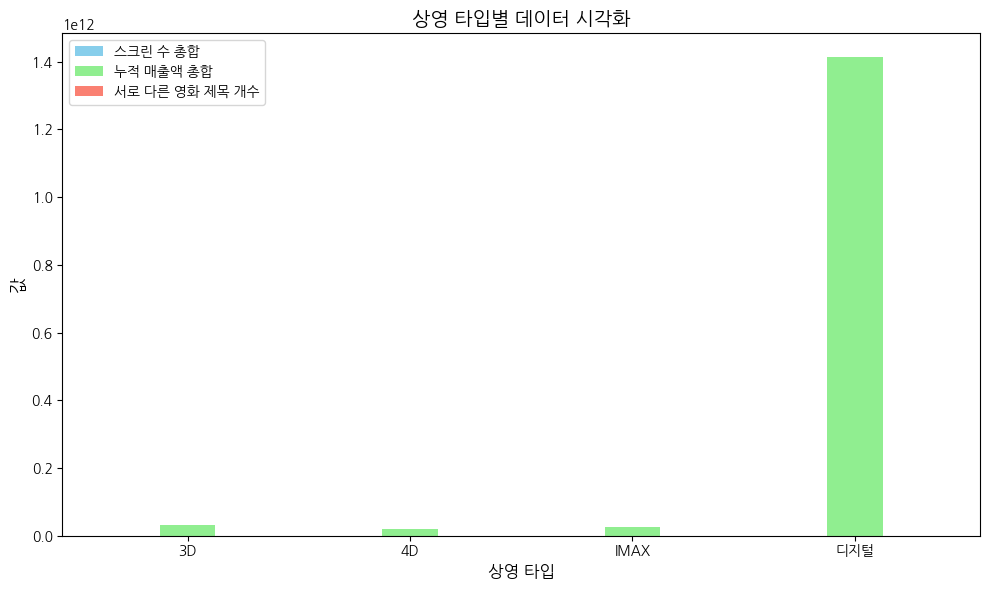

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib
# 데이터 정의
types = ["3D", "4D", "IMAX", "디지털"]
screen_totals = [2867, 800, 320, 112649]
revenue_totals = [32490874000, 19294747000, 25467832500, 1413097033040]
unique_titles = [18, 19, 17, 50]

# 그래프 설정
x = np.arange(len(types))  # x축 위치
width = 0.25  # 막대 너비

fig, ax1 = plt.subplots(figsize=(10, 6))

# 스크린 수 총합 막대그래프
ax1.bar(x - width, screen_totals, width, label='스크린 수 총합', color='skyblue')
# 누적 매출액(점유율) 총합 막대그래프
ax1.bar(x, revenue_totals, width, label='누적 매출액 총합', color='lightgreen')
# 서로 다른 영화 제목 개수 막대그래프
ax1.bar(x + width, unique_titles, width, label='서로 다른 영화 제목 개수', color='salmon')

# x축, y축, 타이틀 설정
ax1.set_xlabel('상영 타입', fontsize=12)
ax1.set_ylabel('값', fontsize=12)
ax1.set_title('상영 타입별 데이터 시각화', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(types)
ax1.legend()

# 그래프 표시
plt.tight_layout()
plt.show()


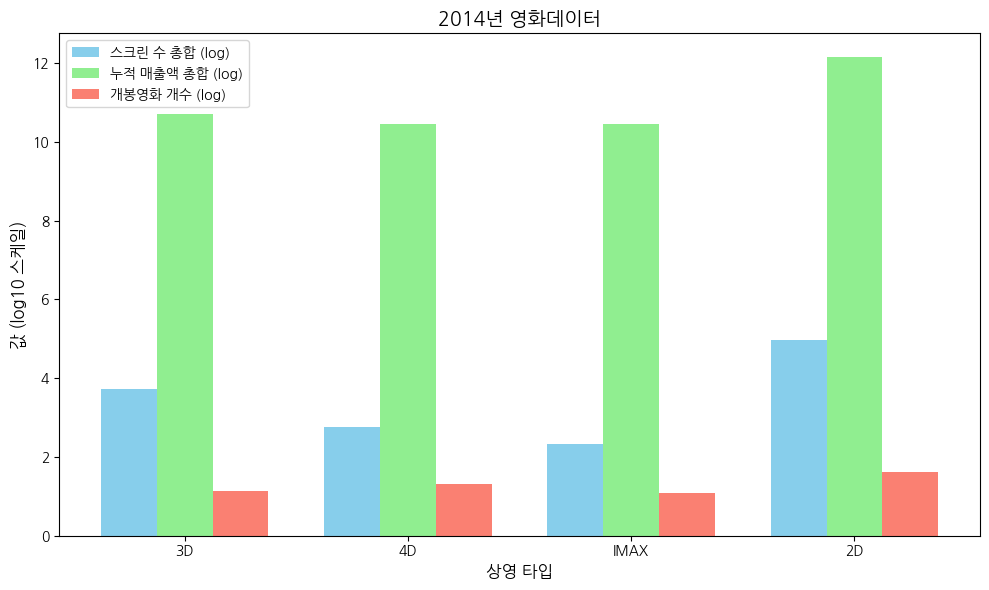

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

# 데이터 정의
types = ["3D", "4D", "IMAX", "2D"]
screen_totals = [5161, 590, 217, 91193]
revenue_totals = [50627332300, 27744302000, 27454503500, 1394559216116]
unique_titles = [14, 20, 12, 42]

# 로그 스케일로 변환
log_screen_totals = np.log10(screen_totals)
log_revenue_totals = np.log10(revenue_totals)
log_unique_titles = np.log10(unique_titles)

# 그래프 설정
x = np.arange(len(types))  # x축 위치
width = 0.25  # 막대 너비

fig, ax1 = plt.subplots(figsize=(10, 6))

# 스크린 수 총합 막대그래프
ax1.bar(x - width, log_screen_totals, width, label='스크린 수 총합 (log)', color='skyblue')
# 누적 매출액 총합 막대그래프
ax1.bar(x, log_revenue_totals, width, label='누적 매출액 총합 (log)', color='lightgreen')
# 개봉영화 개수 막대그래프
ax1.bar(x + width, log_unique_titles, width, label='개봉영화 개수 (log)', color='salmon')

# x축, y축, 타이틀 설정
ax1.set_xlabel('상영 타입', fontsize=12)
ax1.set_ylabel('값 (log10 스케일)', fontsize=12)
ax1.set_title('2014년 영화데이터', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(types)
ax1.legend()

# 그래프 표시
plt.tight_layout()
plt.show()


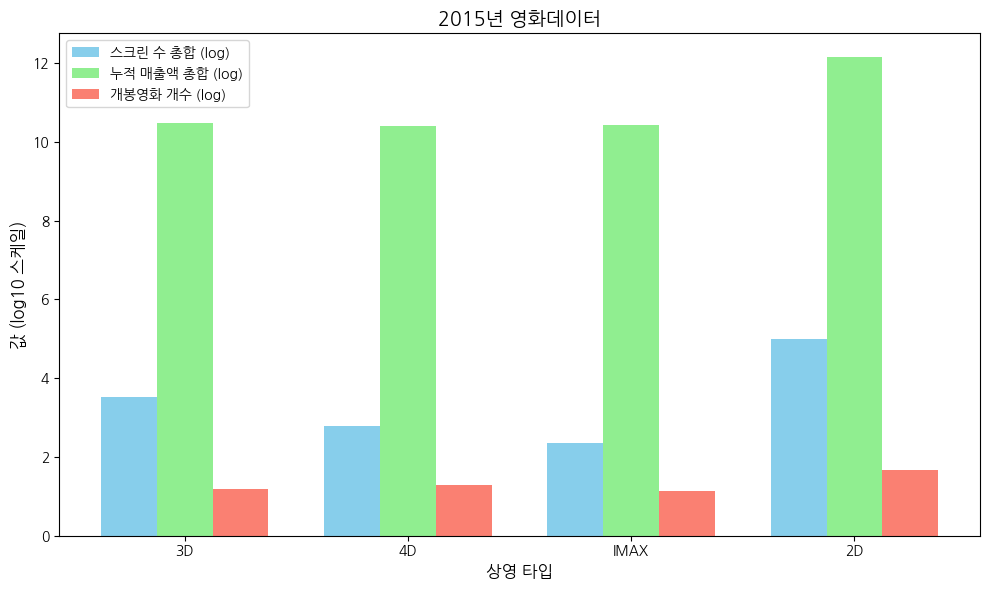

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

# 데이터 정의
types = ["3D", "4D", "IMAX", "2D"]
screen_totals = [3404, 628, 230, 97434]
revenue_totals = [30225567100, 25761635860, 26247482000, 1414906201888]
unique_titles = [15, 19, 14, 48]

# 로그 스케일로 변환
log_screen_totals = np.log10(screen_totals)
log_revenue_totals = np.log10(revenue_totals)
log_unique_titles = np.log10(unique_titles)

# 그래프 설정
x = np.arange(len(types))  # x축 위치
width = 0.25  # 막대 너비

fig, ax1 = plt.subplots(figsize=(10, 6))

# 스크린 수 총합 막대그래프
ax1.bar(x - width, log_screen_totals, width, label='스크린 수 총합 (log)', color='skyblue')
# 누적 매출액 총합 막대그래프
ax1.bar(x, log_revenue_totals, width, label='누적 매출액 총합 (log)', color='lightgreen')
# 개봉영화 개수 막대그래프
ax1.bar(x + width, log_unique_titles, width, label='개봉영화 개수 (log)', color='salmon')

# x축, y축, 타이틀 설정
ax1.set_xlabel('상영 타입', fontsize=12)
ax1.set_ylabel('값 (log10 스케일)', fontsize=12)
ax1.set_title('2015년 영화데이터', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(types)
ax1.legend()

# 그래프 표시
plt.tight_layout()
plt.show()


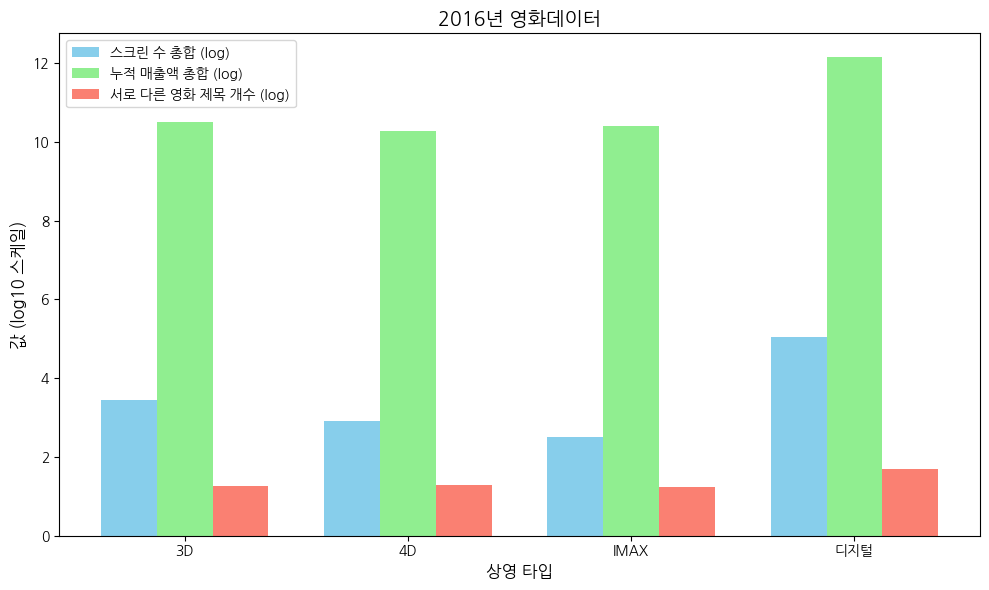

In [27]:
#2016년 데이터 시각화
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

# 데이터 정의
types = ["3D", "4D", "IMAX", "디지털"]
screen_totals = [2867, 800, 320, 112649]
revenue_totals = [32490874000, 19294747000, 25467832500, 1413097033040]
unique_titles = [18, 19, 17, 50]

# 로그 스케일로 변환
log_screen_totals = np.log10(screen_totals)
log_revenue_totals = np.log10(revenue_totals)
log_unique_titles = np.log10(unique_titles)

# 그래프 설정
x = np.arange(len(types))  # x축 위치
width = 0.25  # 막대 너비

fig, ax1 = plt.subplots(figsize=(10, 6))

# 스크린 수 총합 막대그래프
ax1.bar(x - width, log_screen_totals, width, label='스크린 수 총합 (log)', color='skyblue')
# 누적 매출액(점유율) 총합 막대그래프
ax1.bar(x, log_revenue_totals, width, label='누적 매출액 총합 (log)', color='lightgreen')
# 서로 다른 영화 제목 개수 막대그래프
ax1.bar(x + width, log_unique_titles, width, label='서로 다른 영화 제목 개수 (log)', color='salmon')

# x축, y축, 타이틀 설정
ax1.set_xlabel('상영 타입', fontsize=12)
ax1.set_ylabel('값 (log10 스케일)', fontsize=12)
ax1.set_title('2016년 영화데이터', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(types)
ax1.legend()

# 그래프 표시
plt.tight_layout()
plt.show()


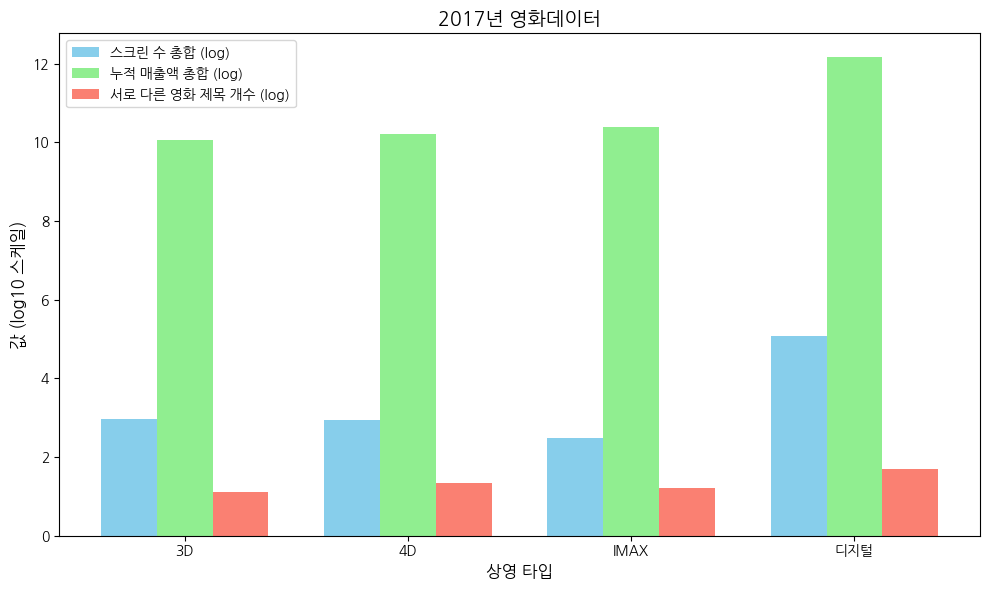

In [26]:

#2017년 데이터 시각화
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

# 데이터 정의
types = ["3D", "4D", "IMAX", "디지털"]
screen_totals = [932, 886, 302, 121149]
revenue_totals = [11249359100, 16154068500, 24473303000, 1457717818333]
unique_titles = [13, 22, 16, 50]

# 로그 스케일로 변환
log_screen_totals = np.log10(screen_totals)
log_revenue_totals = np.log10(revenue_totals)
log_unique_titles = np.log10(unique_titles)

# 그래프 설정
x = np.arange(len(types))  # x축 위치
width = 0.25  # 막대 너비

fig, ax1 = plt.subplots(figsize=(10, 6))

# 스크린 수 총합 막대그래프
ax1.bar(x - width, log_screen_totals, width, label='스크린 수 총합 (log)', color='skyblue')
# 누적 매출액(점유율) 총합 막대그래프
ax1.bar(x, log_revenue_totals, width, label='누적 매출액 총합 (log)', color='lightgreen')
# 서로 다른 영화 제목 개수 막대그래프
ax1.bar(x + width, log_unique_titles, width, label='서로 다른 영화 제목 개수 (log)', color='salmon')

# x축, y축, 타이틀 설정
ax1.set_xlabel('상영 타입', fontsize=12)
ax1.set_ylabel('값 (log10 스케일)', fontsize=12)
ax1.set_title('2017년 영화데이터', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(types)
ax1.legend()

# 그래프 표시
plt.tight_layout()
plt.show()
